# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats 
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

13270.422265141257
12105.484975561605


<function matplotlib.pyplot.show(close=None, block=None)>

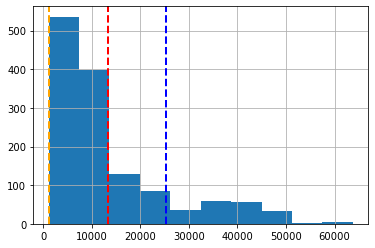

In [5]:
#Plotting the histogram for charges
medical['charges'].hist()

#Calculate the mean and standard deviation
mean_charge = np.mean(medical['charges'])
std_charge = np.std(medical['charges'])
print(mean_charge)
print(std_charge)

#Plotting the histogram with mean and std
plt.axvline(mean_charge, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_charge - std_charge, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(mean_charge + std_charge, color='blue', linestyle='dashed', linewidth=2)

plt.show

The mean charge (represented by the red line) is between 10,000 and 20,000 at about 13,270. This tell us that the mean charge for hospital visits is over 10,000. The standard deviation is 12,105, this tells us that charges vary from case to case and the values are disperesed. The mean allows us to estimate the average charge for a particular person based on their bmi, age and sex while the standard deviation helps us to determine outliers in the data and understand the range of charges. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ First, we would need to ensure that the sample used is representative of the population and the data was collected using the appropriate methods. One those conditions are assumed to be met, we can look at the population mean charge. Since we are comparing the mean charge to the assumed average charge of 12,000, the most appropriate test would be the one sample t-test. A one sample t-test would test whether the sample mean is significantly different from the hypothesized value of 12,000, given the sample size and standard deviation.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [6]:
#Calculating sample statistics
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
sample_size = len(medical['charges'])

#Calculating the critical t-value
alpha = 0.05 
tv = sample_size - 1
t_critical = t.ppf(alpha, tv)

#Calculating the one-sided confidence interval for the mean
se = sample_std / np.sqrt(sample_size)
lower_bound = sample_mean - (t_critical * se)

print(f"Sample mean: {sample_mean}")
print(f"Sample standadrd deviation: {sample_std}")
print(f"Sample size: {sample_size}")
print(f"Critical t-value: {t_critical}")
print(f"Lower bound of one-sided 95% confidence interval: {lower_bound}")

Sample mean: 13270.422265141257
Sample standadrd deviation: 12110.011236693994
Sample size: 1338
Critical t-value: -1.6459941145571324
Lower bound of one-sided 95% confidence interval: 13815.357346466282


__A:__ Since the administrator is concerned that the actual average charge has fallen below 12,000, a one-sided confidence interval would be appropriate. This type of interval will only provide the lower bound of the range of values that are likely to contain the population mean charge. Since the lower bound value is above the 12,0000 the administration should not be concerned at this time 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The assumption about the variances of the two groups being made here is that the two gorups have equal variance. This is known as the assumption of homogeneity variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [17]:
#Separating the charges for insured and uninsured into separate arrays
charges_insured = medical.loc[medical['insuranceclaim'] == 1, 'charges'].values
charges_uninsured = medical.loc[medical['insuranceclaim'] ==0, 'charges'].values

#CCalculating the sample sizes and degress of freddom
n0 = len(charges_insured)
n1 = len(charges_uninsured)
df = n0 + n1 - 2

#Calulating the sample means and variances
xbar0 = charges_insured.mean()
xbar1 = charges_uninsured.mean()
s2_0 = charges_insured.var(ddof=1)
s2_1 = charges_uninsured.var(ddof=1)

#Calculating the pooled standard deviation and t-test
sp = ((n0 - 1)*s2_0 + (n1 - 1)*s2_1) / df
sp = sp**(1/2)
t = (xbar0 - xbar1) / (sp * (1/n0 + 1/n1)**(1/2))

#Calculating the p-value and printing the results
pval = 2 * stats.t.sf(abs(t), df)
if pval < 0.05:
    print("There is evidence of a significant difference between insured and uninsured charges")
else:
    print("There is no evidence of a significant different between inusred and uninsured charges")

There is evidence of a significant difference between insured and uninsured charges


n0 = 783 (number of insured charges)
n1 = 555 (number of uninsured charges)
xbar0 = 16423.93 (mean of insured charges)
xbar1 = 8821.42 (mean of uninsured charges)
s2_0 = 197236140.77 (sample variance of insured charges)
s2_1 = 41557492.81 (sample variance of uninsured charges)
sp = sqrt(((n0 - 1)*s2_0 + (n1 - 1)*s2_1) / (n0 + n1 - 2)) = 11561.70
t = (xbar0 - xbar1) / (sp * sqrt(1/n0 + 1/n1)) = 11.89
pval = 2 * (1 - F(t, df)) = 0.000000000000000002273 where F(t, df) is the cumulative distribution function of the t-distribution with df degrees of freedom evaluated at t.


Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis and conclude that there is evidence of a significant difference between insured and uninsured charges.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The equivalent function for performing a z-test from a sample is 'scipy.stats.ztest()'. This function tests the null hypothesis that the population mean is equal to a specificed value, using a z-test. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test